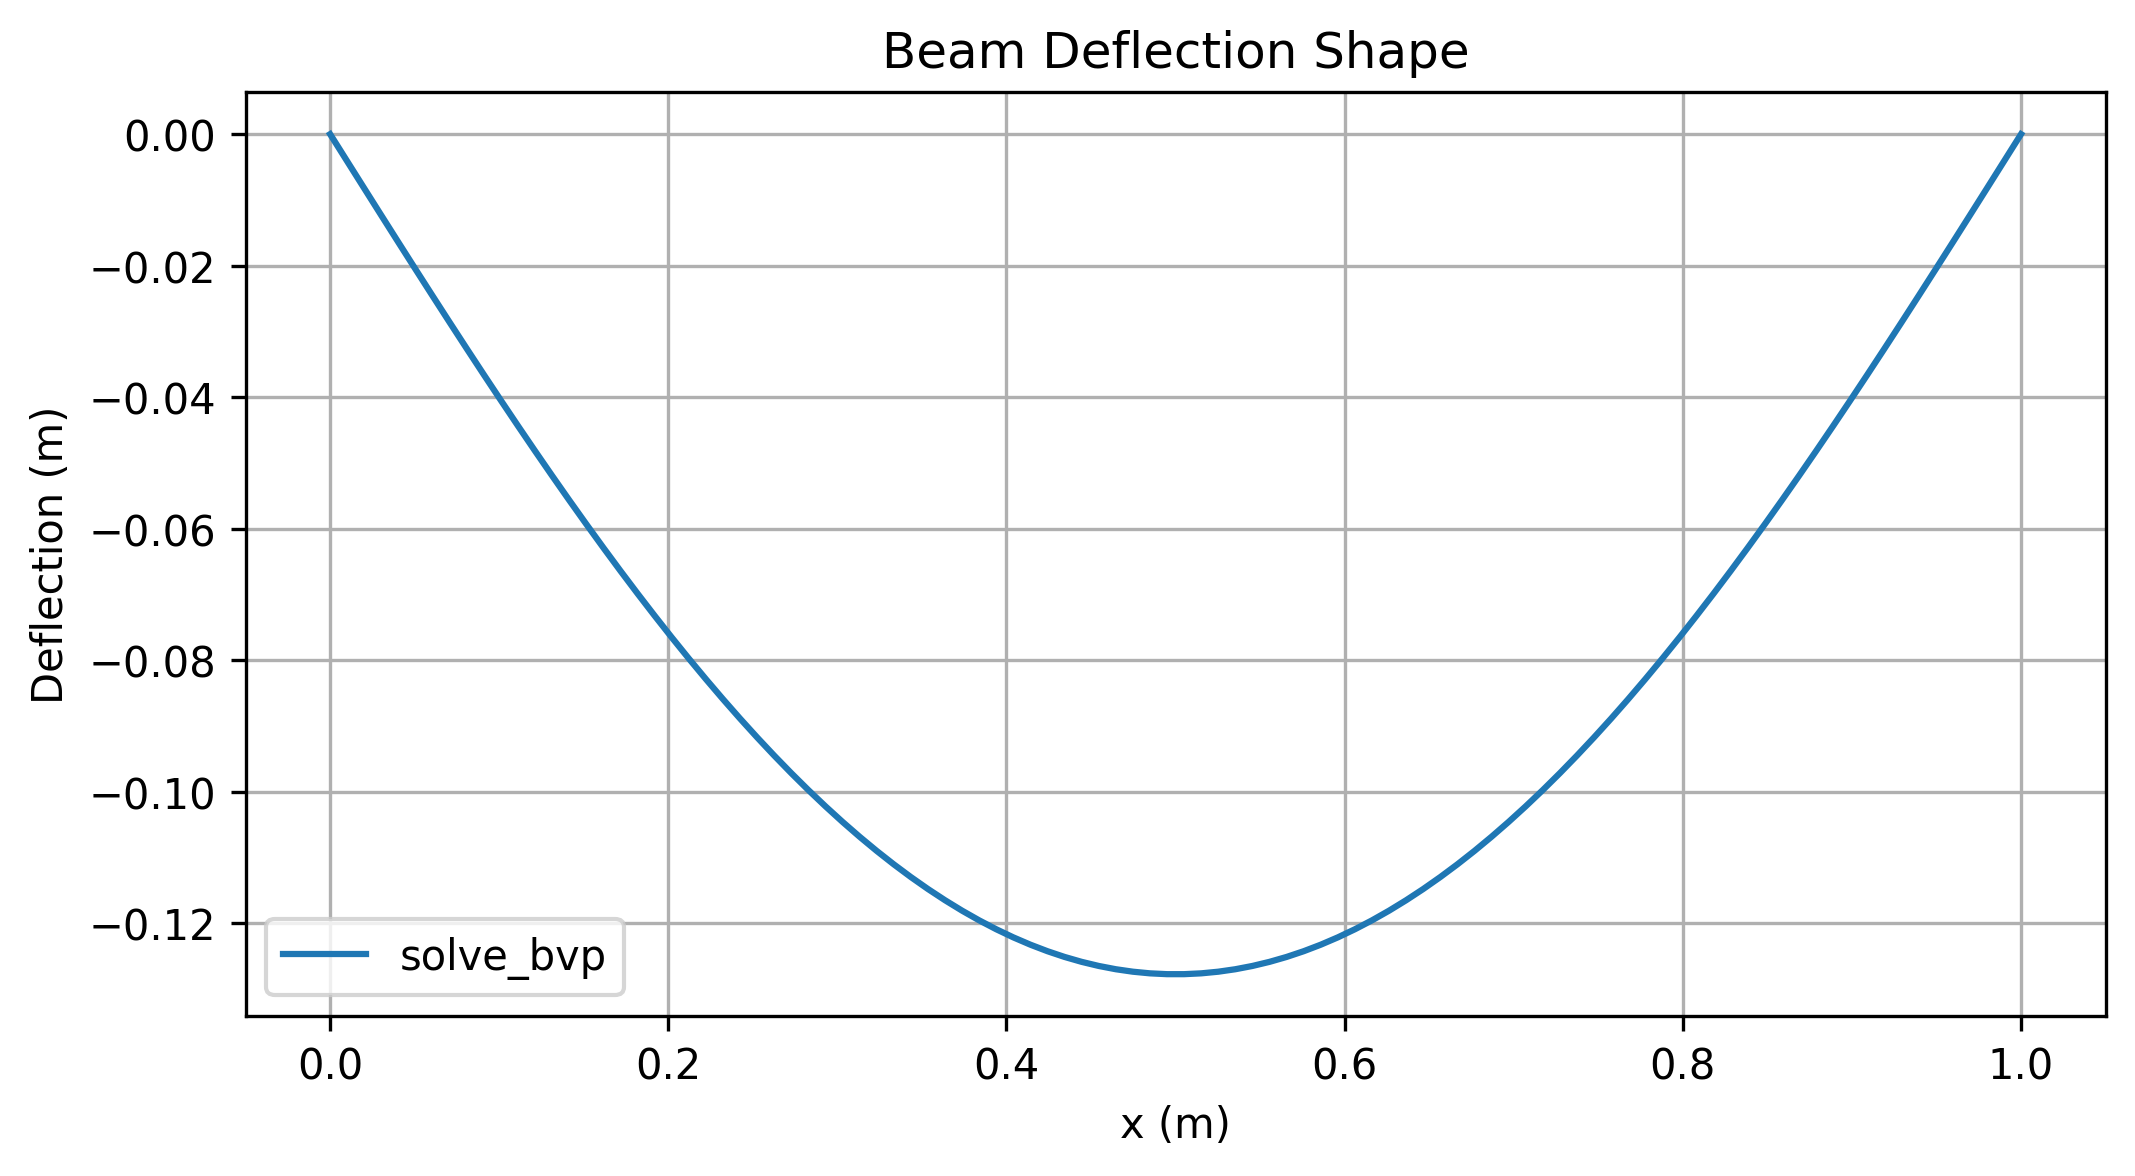

Maximum deflection (solve_bvp): 0.1277 m


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from scipy.sparse import diags

# 물리 상수
K = 1000  # 막대의 굽힘 강성 (N*m^2)
rho = 1000  # 막대의 밀도 (kg/m^3)
g = 9.81  # 중력 가속도 (m/s^2)
L = 1  # 막대의 길이 (m)

# 상태 변수를 사용한 1차 미분 방정식의 연립
def beam_equations(x, y):
    return np.vstack((y[1], y[2], y[3], -rho*g/K * np.ones_like(y[0])))

# 경계 조건
def boundary_conditions(ya, yb):
    return np.array([ya[0], ya[2], yb[0], yb[2]])

# 초기 추정값
x = np.linspace(0, L, 100)
y_init = np.zeros((4, x.size))

# solve_bvp를 사용하여 경계 값 문제 풀이
sol = solve_bvp(beam_equations, boundary_conditions, x, y_init)

# 막대의 처짐 형상 그리기
plt.figure(figsize=(8, 4), dpi=300)
plt.plot(x, sol.sol(x)[0], label='solve_bvp')
plt.xlabel('x (m)')
plt.ylabel('Deflection (m)')
plt.title('Beam Deflection Shape')
plt.grid(True)
plt.legend()
plt.show()

# 최대 처짐량 계산 및 비교
max_deflection_bvp = np.max(np.abs(sol.sol(x)[0]))
print(f"Maximum deflection (solve_bvp): {max_deflection_bvp:.4f} m")

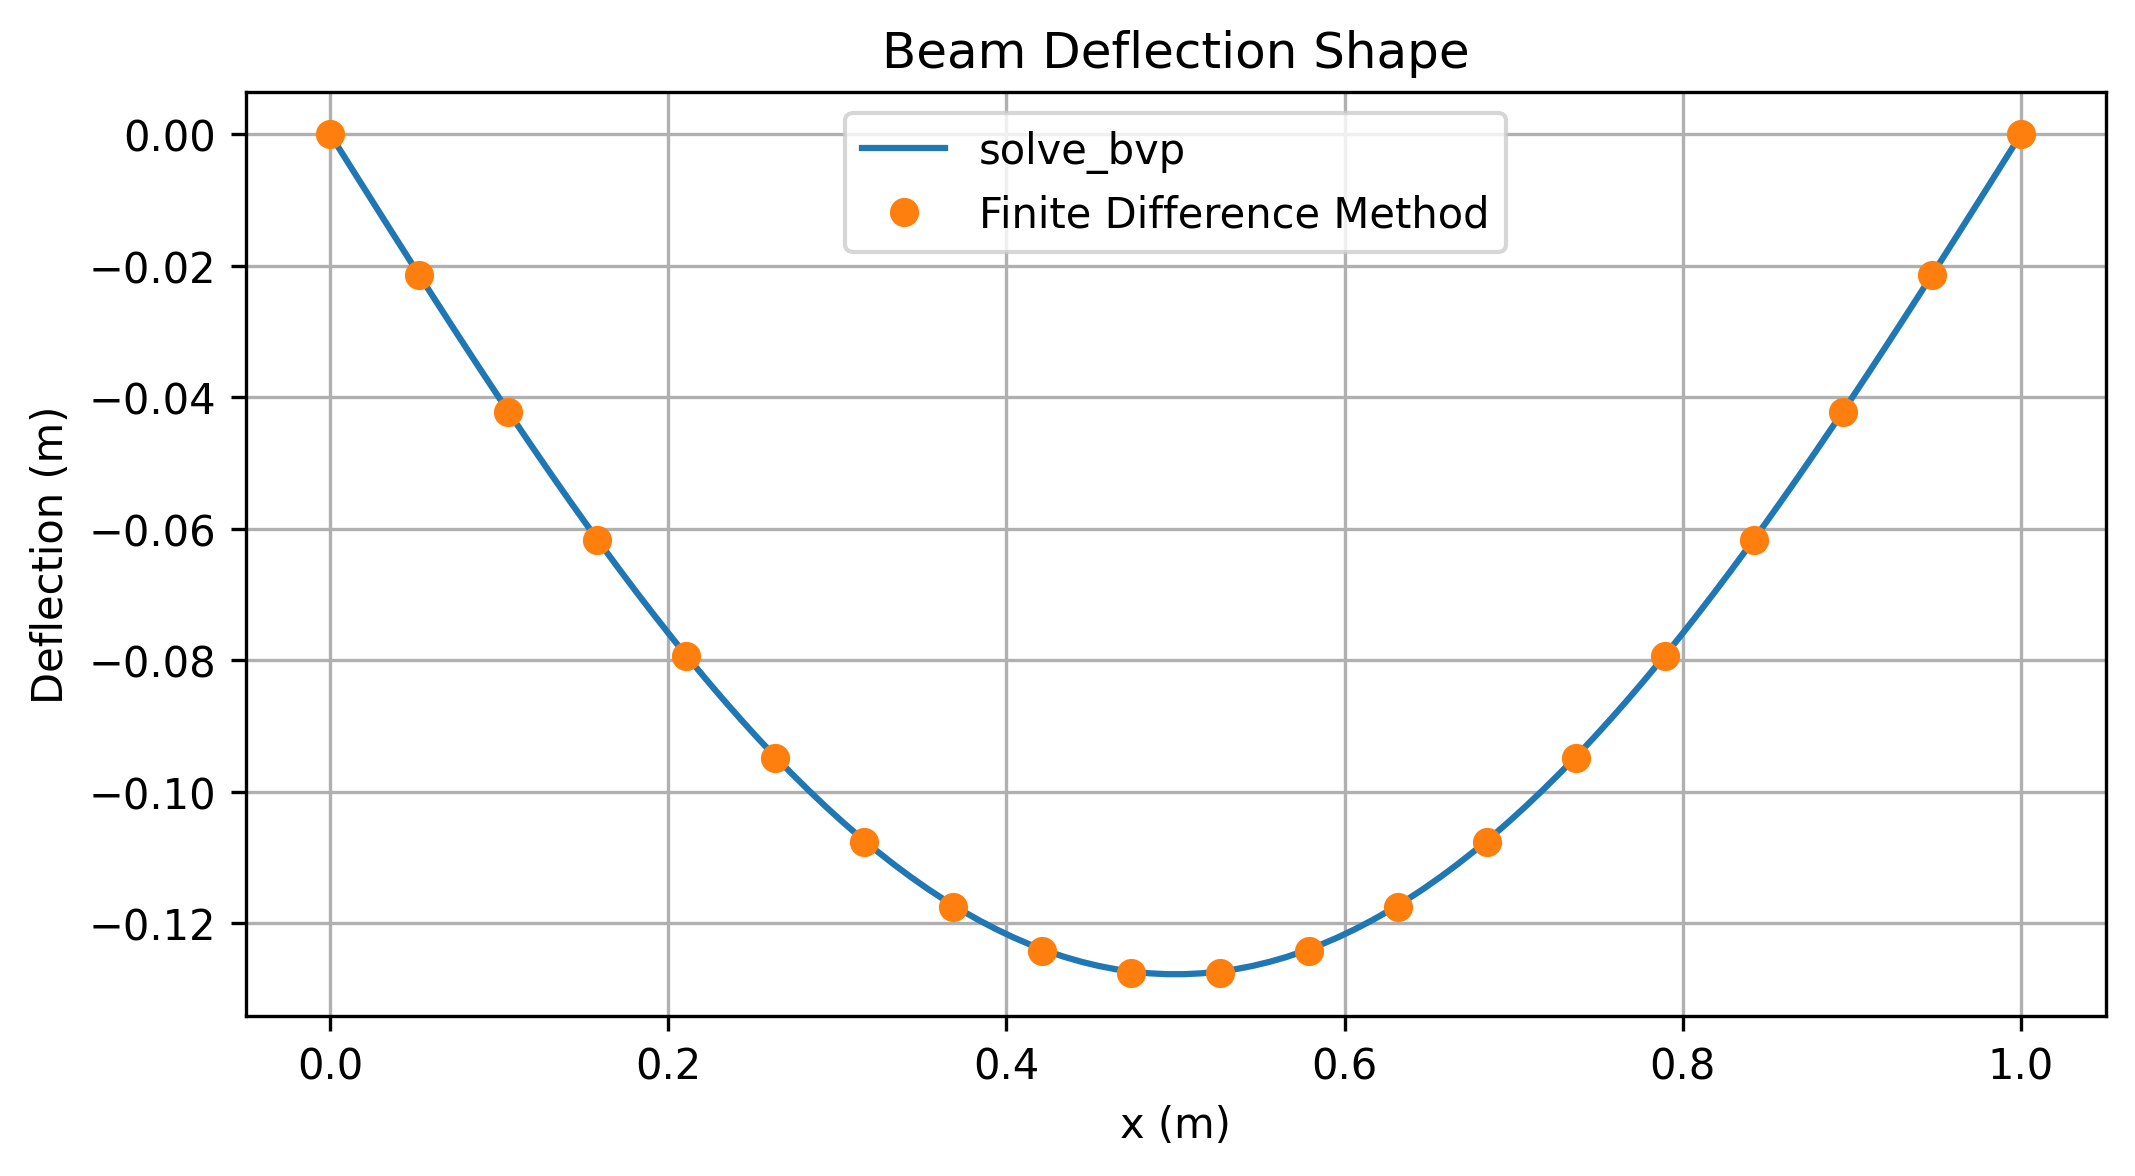

Maximum deflection (solve_bvp): 0.1277 m
Maximum deflection (Finite Difference Method): 0.1276 m


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from scipy.sparse import diags

# 물리 상수
K = 1000  # 막대의 굽힘 강성 (N*m^2)
rho = 1000  # 막대의 밀도 (kg/m^3)
g = 9.81  # 중력 가속도 (m/s^2)
L = 1  # 막대의 길이 (m)

# 상태 변수를 사용한 1차 미분 방정식의 연립
def beam_equations(x, y):
    return np.vstack((y[1], y[2], y[3], -rho*g/K * np.ones_like(y[0])))

# 경계 조건
def boundary_conditions(ya, yb):
    return np.array([ya[0], ya[2], yb[0], yb[2]])

# 초기 추정값
x = np.linspace(0, L, 100)
y_init = np.zeros((4, x.size))

# solve_bvp를 사용하여 경계 값 문제 풀이
sol = solve_bvp(beam_equations, boundary_conditions, x, y_init)

# 유한차분법을 사용하여 막대의 처짐 계산
def finite_difference_method(N):
    h = L / (N - 1)
    x_fdm = np.linspace(0, L, N)
    A = np.zeros((N, N))
    b = np.zeros(N)

    # 내부 노드
    h = L / (N - 1)
    x_fdm = np.linspace(0, L, N)
    
    # 대각선 요소 생성
    diagonals = [1, -4, 6, -4, 1]
    offsets = [-2, -1, 0, 1, 2]
    
    # 희소 행렬 생성
    A = diags(diagonals, offsets, shape=(N-2, N-2)).toarray()
    A[0,0] = 5
    A[-1,-1] = 5

    b = -rho * g * h**4 / K * np.ones(N-2)

    # 선형 연립 방정식 풀이
    y_fdm = np.linalg.solve(A, b)

    y_fdm = np.concatenate(([0], y_fdm, [0]))

    return x_fdm, y_fdm

# 유한차분법 적용
N = 20
x_fdm, y_fdm = finite_difference_method(N)

# 막대의 처짐 형상 그리기
plt.figure(figsize=(8, 4), dpi=300)
plt.plot(x, sol.sol(x)[0], label='solve_bvp')
plt.plot(x_fdm, y_fdm, 'o', label='Finite Difference Method')
plt.xlabel('x (m)')
plt.ylabel('Deflection (m)')
plt.title('Beam Deflection Shape')
plt.grid(True)
plt.legend()
plt.show()

# 최대 처짐량 계산 및 비교
max_deflection_bvp = np.max(np.abs(sol.sol(x)[0]))
max_deflection_fdm = np.max(np.abs(y_fdm))
print(f"Maximum deflection (solve_bvp): {max_deflection_bvp:.4f} m")
print(f"Maximum deflection (Finite Difference Method): {max_deflection_fdm:.4f} m")